In [1]:
import pandas as pd

db_folder = '/home/georgy/Documents/deepfakes/'

data_file = db_folder + 'LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
data_pred_file = 'train_scores/scores-lfcc-asvspoof21-LA.txt'

In [2]:
data = pd.read_csv(data_file, sep=' ', header=None)

data = data[[0, 1, 3, 4]]
data['label'] = data[4].apply(lambda x: 1 if x=='bonafide' else 0)
data = data.rename(columns={0: 'speaker', 1: 'record', 3: 'algo', 4: 'bona or spoof'})
data

,speaker,record,algo,bona or spoof,label
0,LA_0079,LA_T_1138215,-,bonafide,1
1,LA_0079,LA_T_1271820,-,bonafide,1
2,LA_0079,LA_T_1272637,-,bonafide,1
3,LA_0079,LA_T_1276960,-,bonafide,1
4,LA_0079,LA_T_1341447,-,bonafide,1
...,...,...,...,...,...
25365,LA_0098,LA_T_9717580,A06,spoof,0
25366,LA_0098,LA_T_9779814,A06,spoof,0
25367,LA_0098,LA_T_9783312,A06,spoof,0
25368,LA_0098,LA_T_9839348,A06,spoof,0


In [3]:
data_pred = pd.read_csv(data_pred_file, sep=' ', header=None)
# Выбираем эвристическим путем
thresshold = 1.0
data_pred['label_pred'] = data_pred[1].apply(lambda x: 1 if x >= thresshold else 0)
data_pred = data_pred.rename(columns={0: 'record', 1: 'score'})
data_pred

,record,score,label_pred
0,LA_T_1138215,1.820411,1
1,LA_T_1271820,2.148813,1
2,LA_T_1272637,2.161084,1
3,LA_T_1276960,1.327647,1
4,LA_T_1341447,1.442502,1
...,...,...,...
25365,LA_T_9717580,-0.264095,0
25366,LA_T_9779814,-0.128802,0
25367,LA_T_9783312,-0.007868,0
25368,LA_T_9839348,0.114786,0


In [4]:
data = data.merge(right=data_pred, on='record')

In [5]:
data

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0079,LA_T_1138215,-,bonafide,1,1.820411,1
1,LA_0079,LA_T_1271820,-,bonafide,1,2.148813,1
2,LA_0079,LA_T_1272637,-,bonafide,1,2.161084,1
3,LA_0079,LA_T_1276960,-,bonafide,1,1.327647,1
4,LA_0079,LA_T_1341447,-,bonafide,1,1.442502,1
...,...,...,...,...,...,...,...
25365,LA_0098,LA_T_9717580,A06,spoof,0,-0.264095,0
25366,LA_0098,LA_T_9779814,A06,spoof,0,-0.128802,0
25367,LA_0098,LA_T_9783312,A06,spoof,0,-0.007868,0
25368,LA_0098,LA_T_9839348,A06,spoof,0,0.114786,0


In [6]:
accuracy = (data.shape[0] - data[data['label'] != data['label_pred']].shape[0]) / data.shape[0]
accuracy

0.9808829325975562

In [7]:
FP = data[(data['label'] == 0) & (data['label_pred'] == 1)]
FP

,speaker,record,algo,bona or spoof,label,score,label_pred
14383,LA_0081,LA_T_2725619,A04,spoof,0,1.150109,1
14473,LA_0081,LA_T_7415463,A04,spoof,0,1.101545,1
14525,LA_0081,LA_T_9870150,A04,spoof,0,1.195155,1
14737,LA_0083,LA_T_1673880,A04,spoof,0,1.102976,1
14752,LA_0083,LA_T_2189841,A04,spoof,0,1.246388,1
...,...,...,...,...,...,...,...
25084,LA_0097,LA_T_5021134,A06,spoof,0,1.187320,1
25196,LA_0098,LA_T_1648019,A06,spoof,0,1.746855,1
25265,LA_0098,LA_T_4546061,A06,spoof,0,1.008996,1
25303,LA_0098,LA_T_6838056,A06,spoof,0,1.058107,1


In [8]:
FN = data[(data['label'] == 1) & (data['label_pred'] == 0)]
FN

,speaker,record,algo,bona or spoof,label,score,label_pred
98,LA_0079,LA_T_8324598,-,bonafide,1,0.656948,0
128,LA_0080,LA_T_1257508,-,bonafide,1,0.644832,0
130,LA_0080,LA_T_1373249,-,bonafide,1,0.800145,0
144,LA_0080,LA_T_2335057,-,bonafide,1,0.142219,0
155,LA_0080,LA_T_2869730,-,bonafide,1,0.892950,0
...,...,...,...,...,...,...,...
2422,LA_0097,LA_T_8502808,-,bonafide,1,0.730823,0
2450,LA_0097,LA_T_9896961,-,bonafide,1,0.908078,0
2459,LA_0098,LA_T_1646336,-,bonafide,1,0.925740,0
2507,LA_0098,LA_T_4774940,-,bonafide,1,0.517598,0


In [9]:
TP = data[(data['label'] == 1) & (data['label_pred'] == 1)]
TP

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0079,LA_T_1138215,-,bonafide,1,1.820411,1
1,LA_0079,LA_T_1271820,-,bonafide,1,2.148813,1
2,LA_0079,LA_T_1272637,-,bonafide,1,2.161084,1
3,LA_0079,LA_T_1276960,-,bonafide,1,1.327647,1
4,LA_0079,LA_T_1341447,-,bonafide,1,1.442502,1
...,...,...,...,...,...,...,...
2574,LA_0098,LA_T_9387015,-,bonafide,1,1.445912,1
2575,LA_0098,LA_T_9497115,-,bonafide,1,1.286928,1
2576,LA_0098,LA_T_9557645,-,bonafide,1,1.568979,1
2577,LA_0098,LA_T_9737995,-,bonafide,1,1.592577,1


In [10]:
TN = data[(data['label'] == 0) & (data['label_pred'] == 0)]
TN

,speaker,record,algo,bona or spoof,label,score,label_pred
2579,LA_0079,LA_T_1004644,A01,spoof,0,-3.962974,0
2580,LA_0079,LA_T_1056709,A01,spoof,0,-4.045224,0
2581,LA_0079,LA_T_1195221,A01,spoof,0,-3.752969,0
2582,LA_0079,LA_T_1265032,A01,spoof,0,-3.946324,0
2583,LA_0079,LA_T_1287124,A01,spoof,0,-3.568082,0
...,...,...,...,...,...,...,...
25365,LA_0098,LA_T_9717580,A06,spoof,0,-0.264095,0
25366,LA_0098,LA_T_9779814,A06,spoof,0,-0.128802,0
25367,LA_0098,LA_T_9783312,A06,spoof,0,-0.007868,0
25368,LA_0098,LA_T_9839348,A06,spoof,0,0.114786,0


In [11]:
# Насколько можем доверять модели, когда предсказывает метку 1 (речь натуральная)
precision = TP.shape[0] / (TP.shape[0] + FP.shape[0])
precision

0.9245742092457421

In [12]:
# Насколько модель покрывает положительный класс
recall = TP.shape[0] / (TP.shape[0] + FN.shape[0])
recall

0.8840635905389685

In [13]:
# среднее гармоническое
average_harmonic = 2 * precision * recall / (precision + recall)
average_harmonic

0.9038652130822596

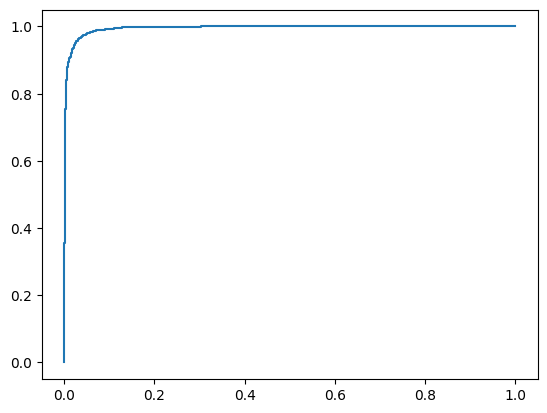

AUC_ROC: 0.9947560982394277


In [17]:
# ROC curve and auc_roc
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y = data['label'].to_numpy()
scores = data['score'].to_numpy()

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

plt.plot(fpr,tpr)
plt.savefig('lfcc.png')
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC_ROC:', auc)

In [15]:
#threshold
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold

0.6289487806588454

In [16]:
#eer
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.034794436400333466